In [50]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy.stats import iqr
import seaborn as sns

# Pregunta 1.

Usar la librería numpy y el método random.choice para generar una matriz de
datos aleatorios de 500 filas y 6 columnas, en donde las entradas sean números
enteros tengan como máximo valor 10000.
Esto significará que tiene 500 clientes que compran 6 categorías de productos
distintos, en donde cada uno compró entre 1 y 10000 unidades en cierto período
de tiempo.

In [51]:
# Creando el arreglo solicitado.
rows = 500
cols = 6
# El valor de arange indica 10001 ya que la función excluye el último número.
df_array = np.array([np.random.choice(np.arange(1, 10001), size=cols,
                                      replace=True) for _ in range(rows)])
print(df_array)

[[3223 6585 8274  442 4170 5239]
 [1954 6934 4200 3189 2253 9120]
 [2762 4026 1259 6737 4650 3452]
 ...
 [6794  385 4232 7995 3167 2652]
 [5637 9474 8905 1834 5879 2087]
 [1135 5781 2637 6042 9398 8503]]


In [52]:
# Convierto en DataFrame el array anteriormente creado para poder asignarle
# nombres a cada columna.
df = pd.DataFrame(df_array)
print(df)

        0     1     2     3     4     5
0    3223  6585  8274   442  4170  5239
1    1954  6934  4200  3189  2253  9120
2    2762  4026  1259  6737  4650  3452
3    7314  8131  6781  3687  8129  2345
4    9916  1181  2433  9241  9196  1511
..    ...   ...   ...   ...   ...   ...
495  9114  2047  9366  7512  9958  2547
496  8873  7413  6050  6361    34  4632
497  6794   385  4232  7995  3167  2652
498  5637  9474  8905  1834  5879  2087
499  1135  5781  2637  6042  9398  8503

[500 rows x 6 columns]


# Pregunta 2.

Las categorías de productos son “vegetales”, “leche”, “abarrotes”,
“congelados”, ”limpieza”, “gourmet”. Nombre las columnas en el orden que usted
quiera.

In [53]:
# Cambio los nombres de las columnas

df_final = df.rename(columns={0: 'vegetales', 1: 'leche', 2: 'abarrotes',
                              3: 'congelados', 4: 'limpieza', 5: 'gourmet'})
print(df_final)

     vegetales  leche  abarrotes  congelados  limpieza  gourmet
0         3223   6585       8274         442      4170     5239
1         1954   6934       4200        3189      2253     9120
2         2762   4026       1259        6737      4650     3452
3         7314   8131       6781        3687      8129     2345
4         9916   1181       2433        9241      9196     1511
..         ...    ...        ...         ...       ...      ...
495       9114   2047       9366        7512      9958     2547
496       8873   7413       6050        6361        34     4632
497       6794    385       4232        7995      3167     2652
498       5637   9474       8905        1834      5879     2087
499       1135   5781       2637        6042      9398     8503

[500 rows x 6 columns]


# Pregunta 3
Normalizar los datos.

Normalmente los métodos a utilizar son Standard, MinMax y Robust. StandarScale
suele utilizarse siempre y cuando se sepa que los datos provienen de una
distribución normal. MinMax en caso de que no se conozca esta información y
RobustScaler en caso de querer hacer la estandarización sin considerar
outliers.

Para determinar el método que mejor se adecúa a este análisis se realiza un 
gráfico de distribución y un gráfico de boxplot. De estos gráficos se puede
notar una distribución normal y la posible no existencia de outliers.

Por lo tanto y según lo anteriormente indicado se considera utilizar el método
Standard Scaler.

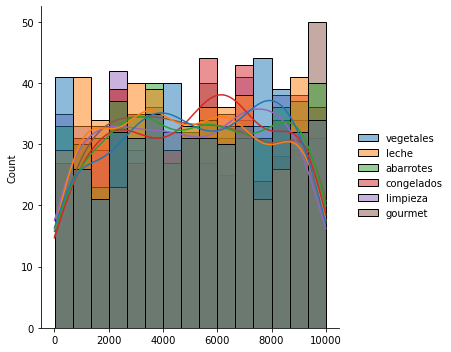

In [54]:
# Gráfico de distribución.
graph_distr = sns.displot(df_final, kde=True)
plt.show()

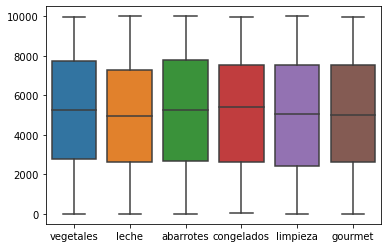

In [55]:
# Gráfico de BoxPlot.
box_plot = sns.boxplot(data=df_final)
plt.show()

In [56]:
# Preprocesamiento por Standard Scaler.
x = df_final.values
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
df_normalizado = pd.DataFrame(x_scaled)
print(df_normalizado)

            0         1         2         3         4         5
0   -0.674830  0.555902  1.067393 -1.657543 -0.290160  0.042920
1   -1.116131  0.677314 -0.324864 -0.695558 -0.947403  1.376131
2   -0.835145 -0.334341 -1.329927  0.546933 -0.125591 -0.570954
3    0.747836  1.093735  0.557172 -0.521161  1.067184 -0.951234
4    1.652694 -1.324079 -0.928722  1.423821  1.433005 -1.237731
..        ...       ...       ...       ...       ...       ...
495  1.373795 -1.022809  1.440575  0.818334  1.694257 -0.881842
496  1.289986  0.843952  0.307359  0.415260 -1.708188 -0.165598
497  0.567003 -1.600997 -0.313928  0.987478 -0.634038 -0.845772
498  0.164651  1.560947  1.283032 -1.170072  0.295771 -1.039862
499 -1.400942  0.276201 -0.859007  0.303547  1.502261  1.164178

[500 rows x 6 columns]


In [57]:
# Vuelvo a nombrar las columnas

df_final_normalizado = (df_normalizado.rename(columns=
                                              {0: 'vegetales',
                                               1: 'leche',
                                               2: 'abarrotes',
                                               3: 'congelados',
                                               4: 'limpieza',
                                               5: 'gourmet'}))
print(df_final_normalizado)

     vegetales     leche  abarrotes  congelados  limpieza   gourmet
0    -0.674830  0.555902   1.067393   -1.657543 -0.290160  0.042920
1    -1.116131  0.677314  -0.324864   -0.695558 -0.947403  1.376131
2    -0.835145 -0.334341  -1.329927    0.546933 -0.125591 -0.570954
3     0.747836  1.093735   0.557172   -0.521161  1.067184 -0.951234
4     1.652694 -1.324079  -0.928722    1.423821  1.433005 -1.237731
..         ...       ...        ...         ...       ...       ...
495   1.373795 -1.022809   1.440575    0.818334  1.694257 -0.881842
496   1.289986  0.843952   0.307359    0.415260 -1.708188 -0.165598
497   0.567003 -1.600997  -0.313928    0.987478 -0.634038 -0.845772
498   0.164651  1.560947   1.283032   -1.170072  0.295771 -1.039862
499  -1.400942  0.276201  -0.859007    0.303547  1.502261  1.164178

[500 rows x 6 columns]


# Pregunta 4.

Remover outliers para cada categoría usando el rango intercuartil.

In [58]:
# Realizo un describe para identificar Q3 y Q1 y utilizarlos.
# Podría haber utilizado otro método, como np.percentile o a través del método
# pandas.Dataframe.quantile, sin embargo me siento débil en temas de iloc, por
# lo que decidí hacerlo de esta manera.

describe_df_final_normal = df_final_normalizado.describe()
print(describe_df_final_normal)

          vegetales         leche     abarrotes    congelados      limpieza  \
count  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02   
mean  -4.929390e-17  5.973000e-17 -8.015810e-17  1.029177e-16  6.927792e-17   
std    1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00   
min   -1.791123e+00 -1.733890e+00 -1.757104e+00 -1.803224e+00 -1.717445e+00   
25%   -8.357532e-01 -8.277313e-01 -8.363661e-01 -8.892160e-01 -8.939187e-01   
50%    2.450560e-02 -1.811168e-02  2.900979e-02  7.399475e-02  6.405812e-03   
75%    8.990223e-01  7.954217e-01  9.049797e-01  8.253376e-01  8.550457e-01   
max    1.675646e+00  1.740108e+00  1.653480e+00  1.674910e+00  1.708314e+00   

            gourmet  
count  5.000000e+02  
mean   5.329071e-18  
std    1.001002e+00  
min   -1.750267e+00  
25%   -8.614025e-01  
50%   -3.162399e-02  
75%    8.383466e-01  
max    1.673278e+00  


In [59]:
# Calculo el rango intercuartil, es decir, Q3 - Q1 a través de la función
# iqr de la librería scipy.
IQR = iqr(describe_df_final_normal, axis=0)
print(IQR)

[1.37860094 1.40629481 1.37321261 1.39178266 1.4013093  1.40813921]


In [60]:
# Parto definiendo los valores del límite inferior.
loc_25 = (describe_df_final_normal.iloc[4, 0:6] - 1.5 * IQR).to_frame()
print(loc_25)

                 25%
vegetales  -2.903655
leche      -2.937174
abarrotes  -2.896185
congelados -2.976890
limpieza   -2.995883
gourmet    -2.973611


In [61]:
# Hago lo mismo con el límite superior.

loc_75 = (describe_df_final_normal.iloc[6, 0:6] + 1.5 * IQR).to_frame()
print(loc_75)

                 75%
vegetales   2.966924
leche       2.904864
abarrotes   2.964799
congelados  2.913012
limpieza    2.957010
gourmet     2.950555


In [62]:
# Aplico filtros para sacar los outliers solicitados y luego concateno
df_T_IQ1 = (df_final_normalizado[((df_final_normalizado.vegetales >=
                                   loc_25.iloc[0, 0]) &
                                  (df_final_normalizado.vegetales <=
                                   loc_75.iloc[0, 0]))])
df_T_IQ2 = (df_final_normalizado[((df_final_normalizado.leche >=
                                   loc_25.iloc[1, 0]) &
                                  (df_final_normalizado.leche <=
                                   loc_75.iloc[1, 0]))])
df_T_IQ3 = (df_final_normalizado[((df_final_normalizado.abarrotes >=
                                   loc_25.iloc[2, 0]) &
                                  (df_final_normalizado.abarrotes <=
                                   loc_75.iloc[2, 0]))])
df_T_IQ4 = (df_final_normalizado[((df_final_normalizado.congelados >=
                                   loc_25.iloc[3, 0]) &
                                  (df_final_normalizado.congelados <=
                                   loc_75.iloc[3, 0]))])
df_T_IQ5 = (df_final_normalizado[((df_final_normalizado.limpieza >=
                                   loc_25.iloc[4, 0]) &
                                  (df_final_normalizado.limpieza <=
                                   loc_75.iloc[4, 0]))])
df_T_IQ6 = (df_final_normalizado[((df_final_normalizado.gourmet >=
                                   loc_25.iloc[5, 0]) &
                                  (df_final_normalizado.gourmet <=
                                   loc_75.iloc[5, 0]))])

df_T_IQ1T = df_T_IQ1[['vegetales']]
df_T_IQ2T = df_T_IQ2[['leche']]
df_T_IQ3T = df_T_IQ3[['abarrotes']]
df_T_IQ4T = df_T_IQ4[['congelados']]
df_T_IQ5T = df_T_IQ5[['limpieza']]
df_T_IQ6T = df_T_IQ6[['gourmet']]
df_T_InterQ = (pd.concat([df_T_IQ1T, df_T_IQ2T, df_T_IQ3T, df_T_IQ4T,
                          df_T_IQ5T, df_T_IQ6T], axis=1, ignore_index=True))
df_T_InterQ.reset_index(inplace=True, drop=True)
print(df_T_InterQ)

            0         1         2         3         4         5
0   -0.674830  0.555902  1.067393 -1.657543 -0.290160  0.042920
1   -1.116131  0.677314 -0.324864 -0.695558 -0.947403  1.376131
2   -0.835145 -0.334341 -1.329927  0.546933 -0.125591 -0.570954
3    0.747836  1.093735  0.557172 -0.521161  1.067184 -0.951234
4    1.652694 -1.324079 -0.928722  1.423821  1.433005 -1.237731
..        ...       ...       ...       ...       ...       ...
495  1.373795 -1.022809  1.440575  0.818334  1.694257 -0.881842
496  1.289986  0.843952  0.307359  0.415260 -1.708188 -0.165598
497  0.567003 -1.600997 -0.313928  0.987478 -0.634038 -0.845772
498  0.164651  1.560947  1.283032 -1.170072  0.295771 -1.039862
499 -1.400942  0.276201 -0.859007  0.303547  1.502261  1.164178

[500 rows x 6 columns]


In [63]:
# Print a describe para ver que el valor mínimo y máximo esté dentro del rango.

df_T_InterQ_describe = df_T_InterQ.describe()
print(df_T_InterQ_describe)

                  0             1             2             3             4  \
count  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02   
mean  -4.929390e-17  5.973000e-17 -8.015810e-17  1.029177e-16  6.927792e-17   
std    1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00   
min   -1.791123e+00 -1.733890e+00 -1.757104e+00 -1.803224e+00 -1.717445e+00   
25%   -8.357532e-01 -8.277313e-01 -8.363661e-01 -8.892160e-01 -8.939187e-01   
50%    2.450560e-02 -1.811168e-02  2.900979e-02  7.399475e-02  6.405812e-03   
75%    8.990223e-01  7.954217e-01  9.049797e-01  8.253376e-01  8.550457e-01   
max    1.675646e+00  1.740108e+00  1.653480e+00  1.674910e+00  1.708314e+00   

                  5  
count  5.000000e+02  
mean   5.329071e-18  
std    1.001002e+00  
min   -1.750267e+00  
25%   -8.614025e-01  
50%   -3.162399e-02  
75%    8.383466e-01  
max    1.673278e+00  


Del describe anterior, nos damos cuenta que no hay outliers en nuestros datos,
lo cual es bastante razonable ya que generamos una muestra aleatoria a través
del método random.choice el cual genera muestras "ideales".

# Pregunta 5.

Aplicar componentes principales a los datos resultantes luego de haber
retirado outliers. Ojo: es sin reducir dimensiones aún.

Según Müller el método PCA 
> es un método que rota el dataset de tal manera que
los futures rotados son estadísticamente no correlacionados.

In [64]:
# Aplicando PCA.

X = df_T_InterQ
pca = PCA(n_components=6)
fit1 = pca.fit_transform(X)
print(fit1)

[[-1.5864834   0.60597569 -0.72259166  0.0677621   0.61604508 -0.97306464]
 [-1.47378544 -0.86872038 -0.19050907  0.7713087   1.1500075   0.45244082]
 [ 1.19090618 -1.07943259 -0.05112893  0.03483636  0.79038014 -0.08302024]
 ...
 [ 1.49310133 -0.2484413   1.29372108  0.49155432 -0.60052645 -0.71318677]
 [-0.80692403  1.243858   -1.9132631  -0.15118665 -0.38379149 -0.78654928]
 [-0.32668292 -1.15713835 -0.12095107 -1.60246613  1.0371914   1.17348724]]


In [65]:
PCA_para_todo = (pd.DataFrame(data=fit1,
                              columns=['vegetales', 'leche', 'abarrotes',
                                       'congelados', 'limpieza', 'gourmet']))
print(PCA_para_todo)  # Imprime el df con los PCA para cada variable.

     vegetales     leche  abarrotes  congelados  limpieza   gourmet
0    -1.586483  0.605976  -0.722592    0.067762  0.616045 -0.973065
1    -1.473785 -0.868720  -0.190509    0.771309  1.150008  0.452441
2     1.190906 -1.079433  -0.051129    0.034836  0.790380 -0.083020
3     0.153034  1.331522  -1.368108   -0.675925 -0.506012 -0.016747
4     2.735395  0.721648   0.938318   -0.979997 -0.956928  0.447378
..         ...       ...        ...         ...       ...       ...
495   0.790209  1.249910   0.696636   -1.654951 -1.923324 -0.465275
496  -0.023220  0.346343  -0.363247    1.997362 -1.139049  0.221874
497   1.493101 -0.248441   1.293721    0.491554 -0.600526 -0.713187
498  -0.806924  1.243858  -1.913263   -0.151187 -0.383791 -0.786549
499  -0.326683 -1.157138  -0.120951   -1.602466  1.037191  1.173487

[500 rows x 6 columns]


# Pregunta 6.

Interpretar cada dimensión respecto a las categorías, y las varianzas
explicadas

Para explicar los ratios de varianza este informe se basa en la información
recopilada desde [aquí](https://bit.ly/36XlN5N).

Primero que todo explicar que la fracción de varianza explicada es el ratio
entre la varianza de cada componente principal y el total de varianza.

Para nuestro caso los ratios son bastante similares aunque el que mayor ratio
es el de la variable 1 , seguido por la variable 2, el valor mínimo es
encontrado en la variable 6 con un 14%.
Otros datos importantes pueden ser que por ejemplo, la variable 1 y 2 juntas 
explican cerca del 40% de la varianza total o si bien dividiéramos en dos 
grupos en donde la variable 1, 2, 3 representan un grupo y las variables 4, 5
y 6 representan otro grupo, el grupo 1 explica la varianza en un 54% 
aproximadamente, dejando para el segundo grupo un 46% de representatividad en 
la varianza. 

In [66]:
# Varianza explicada para cada dimensión
print('Los ratios de varianza son:', pca.explained_variance_ratio_)

Los ratios de varianza son: [0.19115267 0.17255012 0.17020515 0.16771984 0.15782089 0.14055134]


# Pregunta 7.

Reducir a dos dimensiones y graficar en el plano, en conjunto con todas las
componentes.

Interpretar estas componentes conjuntas con las direcciones de las dimensiones
originales.

Al aplicar la reducción nos quedamos con la variable 1 y 2 para explicar la
información. Tomando en cuenta lo explicado en el punto anterior, se puede 
indicar que al reducir las dimensiones estaríamos explicando la varianza en un
38%, es decir dejaríamos de explicar este indicador en un 62%.

In [67]:
# Reduciendo dimensiones.

X2 = df_T_InterQ
pca2 = PCA(n_components=2)
fit_2 = pca2.fit_transform(X2)

In [68]:
# Ratios de varianza explicada para dimensión.
print(('Los ratios para 2 dimensiones de varianza son:',
       pca2.explained_variance_ratio_))

('Los ratios para 2 dimensiones de varianza son:', array([0.19115267, 0.17255012]))


In [69]:
PCA_para_2 = pd.DataFrame(data=fit_2, columns=['PCA1', 'PCA2'])
print(PCA_para_2)  # Imprime el df con los PCA reducidos.

         PCA1      PCA2
0   -1.586483  0.605976
1   -1.473785 -0.868720
2    1.190906 -1.079433
3    0.153034  1.331522
4    2.735395  0.721648
..        ...       ...
495  0.790209  1.249910
496 -0.023220  0.346343
497  1.493101 -0.248441
498 -0.806924  1.243858
499 -0.326683 -1.157138

[500 rows x 2 columns]


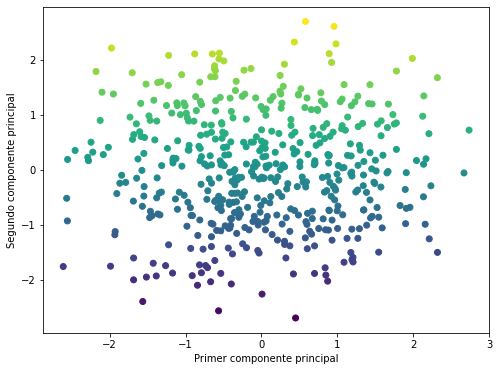

In [70]:
# Graficando

plt.figure(figsize=(8, 6))
plt.scatter(PCA_para_2['PCA1'], PCA_para_2['PCA2'], c=PCA_para_2['PCA2'])
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
plt.show()

# Pregunta 8

Aplicar un método de clusterización a la data reducida, en donde el número de
clusters debe ser óptimo de acuerdo al coeficiente de silhouette si usa k-means
o alguna extensión de éste.

El análisis de silueta se puede utilizar para estudiar la distancia de
separación entre los clústeres resultantes. La gráfica de silueta muestra una
medida de lo cerca que está cada punto de un clúster de los puntos de los
clústeres vecinos y, por lo tanto, proporciona una manera de evaluar parámetros
como el número de clústeres visualmente. Esta medida tiene un rango de [-1, 1].

Los coeficientes de silueta cerca de +1 indican que la muestra está lejos de
los clústeres vecinos. Un valor de 0 indica que el ejemplo está activado o muy
cerca del límite de decisión entre dos clústeres vecinos y los
valores negativos indican que esas muestras podrían haberse asignado al
clúster incorrecto.

En este ejemplo, el análisis de silueta se utiliza para elegir un valor óptimo.
La gráfica de silueta muestra que el valor de 2, 3, 4, 5 y 6 es una buena
elección para los datos dados debido a la presencia de racimos con puntuaciones
de silueta por encima de la media y también debido a bajas fluctuaciones en el
tamaño de las gráficas de silueta.

También a partir del grosor de la gráfica de silueta se puede visualizar el
tamaño del racimo. Por ejemplo la gráfica de silueta para número de clúster 2,
la etiqueta 0 y 1 son bastante parecidas, por lo que el método es capaz de
identificar de buena manera ambos grupos. Lo mismo sucede para todos los
clústeres estudiados, en donde se nota gran uniformidad.

Por lo tanto y según esta metodología el valor óptimo de clúster dependerá de
la pregunta y del objetivo del planteamiento.

Para n_clusters = 2 El coeficiente promedio de silhouette es: 0.33072963925986576
Para n_clusters = 3 El coeficiente promedio de silhouette es: 0.35556897639071655
Para n_clusters = 4 El coeficiente promedio de silhouette es: 0.34261011765764304
Para n_clusters = 5 El coeficiente promedio de silhouette es: 0.33565422779024195
Para n_clusters = 6 El coeficiente promedio de silhouette es: 0.35185429244134364


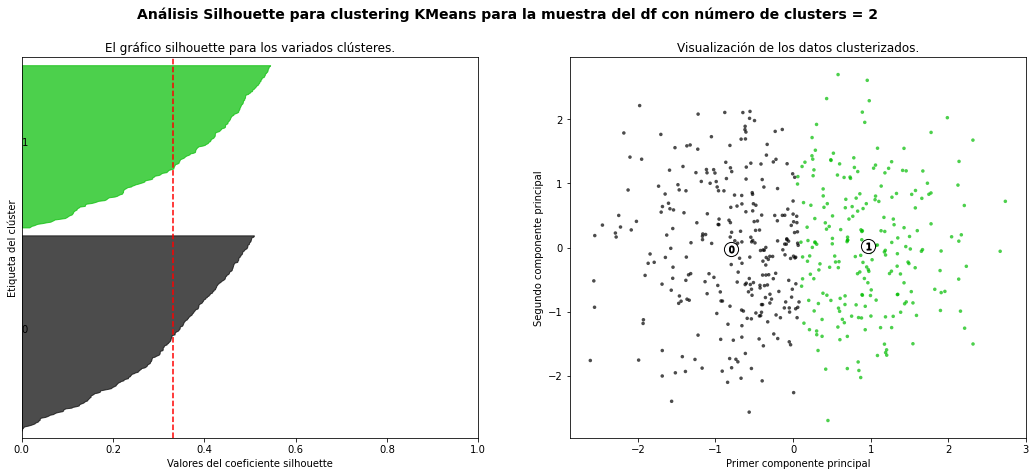

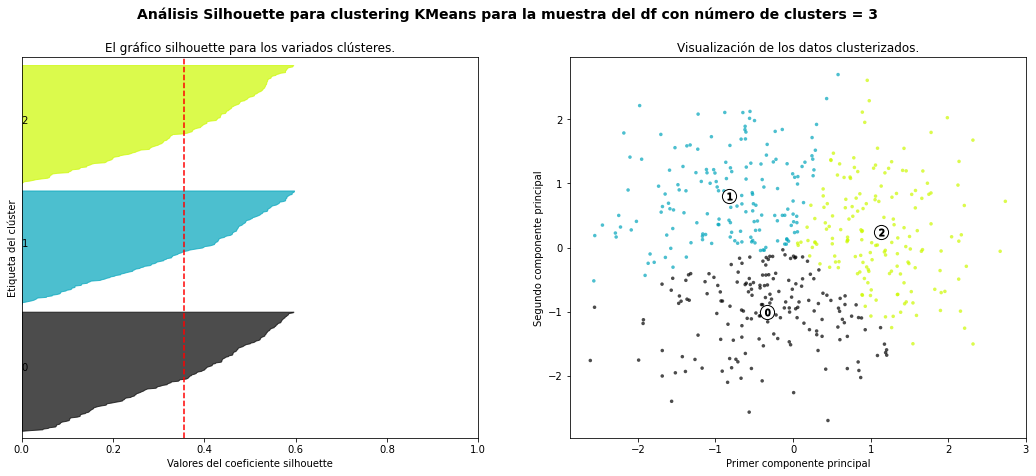

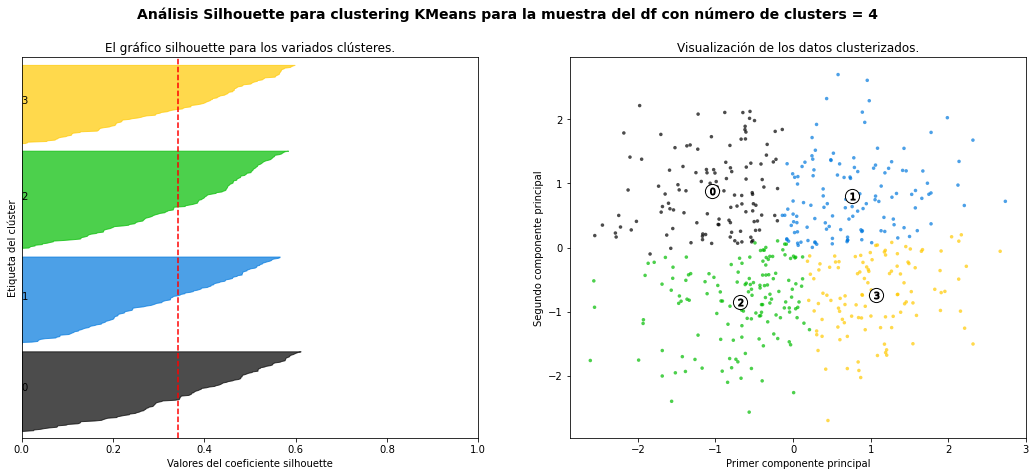

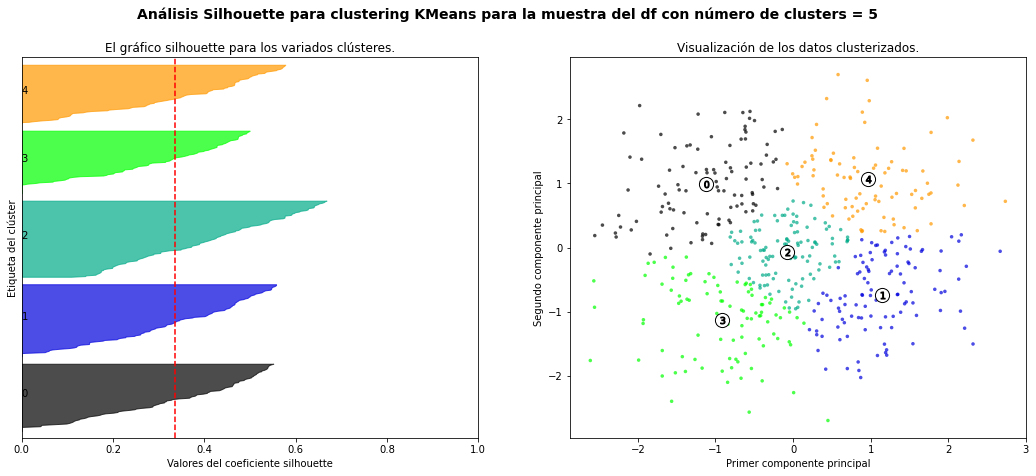

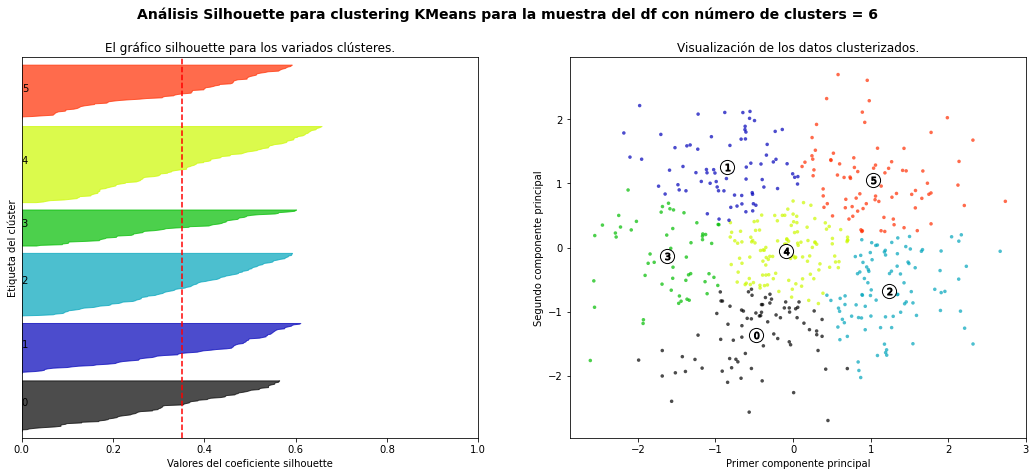

In [71]:
# Fuente: https://bit.ly/3lhWq2p

# Los datos a trabajar

X = fit_2  # fit_2 es el array generado luego de la reducción a 2 dimensiones.

for n_clusters in range(2, 7):

    # Creamos un subplot con 1 fila y dos columnas
    fig, (ax1, ax2) = plt.subplots(1, 2)

    fig.set_size_inches(18, 7)
    # El primer subplot es el gráfico de silhouette
    # El coeficiente puede ir desde el -1, 1 pero en este ejemplo todos están
    # entre 0 y 1
    ax1.set_xlim([0, 1])
    # Esta expresión (n_clusters+1)*10 es para insertar espacios en blanco
    # entre silhouettes
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    # Inicializa el clúster con n_cluster y un generador random
    clusterer = KMeans(n_clusters=n_clusters, max_iter=300, random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    # El silhouette_score entrega el valor promedio para todas las muestras.
    # Esto da una perspectiva de la densidad y separación de la forma de los
    # clústeres.
    silhouette = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El coeficiente promedio de silhouette es:", silhouette)

    # Calcular el silhouette scores para cada muestra
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Agrega los resultados de silhouette scores para muestras que
        # perteneces al cluster i y los ordena
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Etiqueta los gráficos de silhouette con el número del clúster en el
        # medio
        ax1.text(0, y_lower + 0.5 * size_cluster_i, str(i))

        # Calcula el nuevo y_lower para el siguiente gráfico.
        y_lower = y_upper + 10

    ax1.set_title("El gráfico silhouette para los variados clústeres.")
    ax1.set_xlabel("Valores del coeficiente silhouette")
    ax1.set_ylabel("Etiqueta del clúster")

    # La línea vertical puntuada para el promedio del coeficiente de silhouette
    ax1.axvline(x=silhouette, color="red", linestyle="--")

    ax1.set_yticks([])  # Limpiando el yaxis labels / ticks
    ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

    # Segundo gráfico muestra los dos componentes provenientes de la reducción.
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=50, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Etiquetando los clústeres.
    centers = clusterer.cluster_centers_
    # Dibujando un círculo en el centro de cada clúster.
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualización de los datos clusterizados.")
    ax2.set_xlabel("Primer componente principal")
    ax2.set_ylabel("Segundo componente principal")

    plt.suptitle(
        ("Análisis Silhouette para clustering KMeans para la muestra del df "
         "con número de clusters = %d" % n_clusters),
        fontsize=14, fontweight='bold')

plt.show()

# Pregunta 9

Visualizar con el número de clusters óptimo. Caracterizar cada clúster en el
mundo real de acuerdo a los resultados obtenidos.

Para responder esta pegunta podemos ocupar los gráficos obtenidos de la 
pregunta anterior. Se considera además el clúster con el
coeficiente de silhouette consistentemente más alto, es decir, Para 
n_cluster = 3.

En la gráfica podemos notar lo uniforme de los tres grupos identificados.

![Imagen n_clusters = 3](https://bit.ly/3dasXnZ)

# Pregunta 10

Aplicar componentes principales inverso para recuperar los datos originales.

Al volver atrás con el método reverse obtenemos la matriz original con las
mismas dimensiones y datos del df generado al inicio de este informe.

Se aplica la función describe para volver a demostrar que el df generado es 
idéntico al original.

In [72]:

# Fuente: https://bit.ly/3iEnbMB
# Se utiliza la función inverse_transform del módulo sklearn.
df_reverse_PCA6 = scaler.inverse_transform(x_scaled)

In [73]:
# lo transformo en df para mostrarlo de mejor manera.
df_reverse_a_original = (pd.DataFrame(data=df_reverse_PCA6,
                                      columns=['vegetales', 'leche',
                                               'abarrotes', 'congelados',
                                               'limpieza', 'gourmet']))
print('Df revertido es\n\n', df_reverse_a_original)

Df revertido es

      vegetales   leche  abarrotes  congelados  limpieza  gourmet
0       3223.0  6585.0     8274.0       442.0    4170.0   5239.0
1       1954.0  6934.0     4200.0      3189.0    2253.0   9120.0
2       2762.0  4026.0     1259.0      6737.0    4650.0   3452.0
3       7314.0  8131.0     6781.0      3687.0    8129.0   2345.0
4       9916.0  1181.0     2433.0      9241.0    9196.0   1511.0
..         ...     ...        ...         ...       ...      ...
495     9114.0  2047.0     9366.0      7512.0    9958.0   2547.0
496     8873.0  7413.0     6050.0      6361.0      34.0   4632.0
497     6794.0   385.0     4232.0      7995.0    3167.0   2652.0
498     5637.0  9474.0     8905.0      1834.0    5879.0   2087.0
499     1135.0  5781.0     2637.0      6042.0    9398.0   8503.0

[500 rows x 6 columns]


In [74]:
# Describo el df encontrado para ver similitudes con el df "original"
print('Describe df revertido\n\n', df_reverse_a_original.describe())

Describe df revertido

          vegetales        leche    abarrotes   congelados    limpieza  \
count   500.000000   500.000000   500.000000   500.000000   500.00000   
mean   5163.532000  4987.062000  5150.612000  5175.204000  5016.31600   
std    2878.468102  2877.376801  2929.115638  2858.413595  2919.64719   
min      13.000000     3.000000     9.000000    26.000000     7.00000   
25%    2760.250000  2607.750000  2703.250000  2636.000000  2409.00000   
50%    5234.000000  4935.000000  5235.500000  5386.500000  5035.00000   
75%    7748.750000  7273.500000  7798.750000  7532.000000  7510.25000   
max    9982.000000  9989.000000  9989.000000  9958.000000  9999.00000   

           gourmet  
count   500.000000  
mean   5114.058000  
std    2913.933322  
min      19.000000  
25%    2606.500000  
50%    5022.000000  
75%    7554.500000  
max    9985.000000  


In [75]:
# Describo el df_original que es el normalizado y comparo.
print('Describe df original\n\n', df_final.describe())

Describe df original

          vegetales        leche    abarrotes   congelados    limpieza  \
count   500.000000   500.000000   500.000000   500.000000   500.00000   
mean   5163.532000  4987.062000  5150.612000  5175.204000  5016.31600   
std    2878.468102  2877.376801  2929.115638  2858.413595  2919.64719   
min      13.000000     3.000000     9.000000    26.000000     7.00000   
25%    2760.250000  2607.750000  2703.250000  2636.000000  2409.00000   
50%    5234.000000  4935.000000  5235.500000  5386.500000  5035.00000   
75%    7748.750000  7273.500000  7798.750000  7532.000000  7510.25000   
max    9982.000000  9989.000000  9989.000000  9958.000000  9999.00000   

           gourmet  
count   500.000000  
mean   5114.058000  
std    2913.933322  
min      19.000000  
25%    2606.500000  
50%    5022.000000  
75%    7554.500000  
max    9985.000000  


# Bibliografía anexa consultada.

Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras,
and TensorFlow (p. 247-251). O'Reilly Media. Edición de Kindle.

Müller, Andreas C.; Guido, Sarah. Introduction to Machine Learning with
Python (p. 142-156). O'Reilly Media. Edición de Kindle.